# Parkinson's Disease Classification – (SAS Viya ML vs SciKit-Learn)
-------
This notebook highlights the performance of the SAS Viya ML Linear Support Vector Classification algorithm available on Workbench using scikit-learn as a comparison.  

A synthetic dataset with approximately **two million** rows that focuses on Parkinson's Disease Classification. It contains various features related to patient health conditions and outcomes. The objective of this use case is to predict a patient's classification based on patient's clinical characteristics and other markers. The target variable is a binary outcome variable.

Original Dataset: 


In [1]:
#Import required libraries and packages
import time
import pandas as pd 
import numpy  as np
import seaborn as sns
from sasviya.ml.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

#### Data Preparation

In [2]:
dataset = 'parkinson'
train = pd.read_csv(f'{dataset}_train.csv', header=None)
test  = pd.read_csv(f'{dataset}_test.csv',  header=None)
nObs, nCol = train.shape
nFtr = nCol - 1

scaler = StandardScaler()
features = list(range(nFtr))
X_train = scaler.fit_transform(train[features])
X_test  = scaler.transform(test[features])

target  = nFtr 
y_train = train[target]
y_test  = test[target]

In [3]:
#Explore data
train

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1413.4164,0.51179,0.009801,-1987.8270,-1911.9907,-0.66462,7.2891,0.027843,0.000670,1.982500e-03,...,0.043573,1.5800,1,1.5563,0.070818,-2.574100e-04,-138.9617,-120105.9180,0.62079,1
1,-1866.0460,0.65426,0.015409,-4066.5632,-1971.5943,0.20683,9.3110,0.039787,0.005252,8.568200e-03,...,0.010868,3.9272,0,2.0153,0.293840,1.856100e-04,-80.5602,-122866.3412,0.69168,0
2,-7737.0635,0.69229,0.015683,-8301.6796,-3409.3172,-0.28259,2.8404,0.036214,0.000539,1.960000e-05,...,0.028655,2.8889,0,1.8654,0.011663,-1.190600e-03,-98.7381,-200024.8760,0.69603,1
3,-4440.2590,0.38960,0.009565,-9555.9738,-2163.2826,0.65281,5.9896,0.021014,0.000955,1.203400e-03,...,0.044369,15.9292,0,1.5798,0.095090,7.680000e-05,-117.0085,-117446.9627,0.66248,1
4,-3376.7472,0.33689,0.009121,-2790.0719,-3165.1109,3.37730,59.8191,0.020421,0.000161,4.530000e-05,...,0.011125,1.6259,1,1.6006,0.041836,8.200000e-19,-289.0506,-196484.7656,0.71171,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166779,-5928.2745,0.55702,0.009900,-3494.0071,-3332.0246,2.90950,64.0153,0.027241,0.000602,2.100000e-05,...,0.004885,1.5516,1,1.6365,0.027656,1.250000e-16,-260.3668,-215940.6442,0.80000,1
2166780,-10091.6164,0.64984,0.028294,-9680.0307,-4250.3538,2.95060,4.4440,0.079312,0.000110,7.330000e-07,...,0.001243,8.3681,1,4.8099,0.002363,-1.660000e-17,-198.5625,-254823.0514,0.70072,1
2166781,-11969.4857,0.62656,0.027489,-10088.2522,-3343.2606,2.04980,39.4761,0.079804,0.001629,2.627000e-04,...,0.007449,3.4977,0,4.8125,0.027115,-7.400000e-17,-108.6955,-166296.4302,0.80616,1
2166782,-2060.9471,0.50447,0.008344,-2711.6304,-2201.4183,-1.37810,4.4165,0.020956,0.000611,1.414800e-03,...,0.063305,1.6118,1,1.6012,0.056175,-1.119700e-03,-160.9059,-125357.3699,0.61766,1


<Axes: >

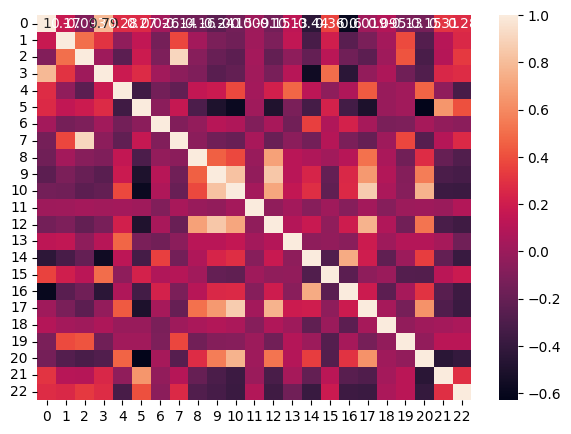

In [4]:
# Display heatmap
plt.figure(figsize=(7,5))
sns.heatmap(train.corr(), fmt='.2g', annot=True)

##  Model Training  

<body>Linear Support Vector Classification (Linear SVC) is a supervised machine learning algorithm used for binary classification tasks.</body>
<hr width="100%" size="2">


#### **SAS Viya** – Linear Support Vector Classification (Linear SVC)




In [5]:
def SASViyaML_Train():
    sas_model = SVC(kernel='linear', max_iter=1000, tol=0.0001, random_state=1)
    sas_model.fit(X_train, y_train)
    return (sas_model)
sas_model = SASViyaML_Train()
SASViyaML_Train_Time = %timeit -r 1 -o SASViyaML_Train()

20.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [6]:
def SASViyaML_Test():
    predictions = sas_model.predict(X_test)
    return (predictions)
predictions = SASViyaML_Test()
print("Accuracy Score :", round(accuracy_score(y_test, predictions)*100 ,2), "%")
SASViyaML_Test_Time = %timeit -r 1 -o SASViyaML_Test()

Accuracy Score : 81.42 %
880 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Text(0.5, 1.0, 'Accuracy Score for SAS Viya ML: 81.42')

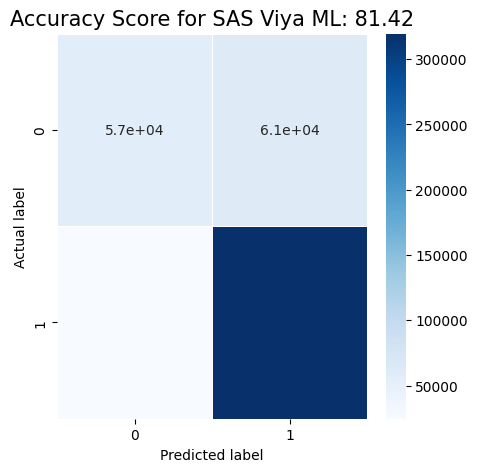

In [7]:
#Visual Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for SAS Viya ML: {0}'.format(round(accuracy_score(y_test, predictions)*100 ,2))
plt.title(all_sample_title, size = 15)

In [8]:
#Print Confusion Matrix
print("SAS WB Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("SAS WB Precision: ", precision_score(y_test, predictions, average=None))
print("SAS WB Recall:    ", recall_score(y_test, predictions, average=None))
print("SAS WB F1 score:  ", f1_score(y_test, predictions, average=None))
print("-------------------------------- ")

WB_Precision = precision_score(y_test, predictions, average=None)
WB_Recall = recall_score(y_test, predictions, average=None)
WB_F1 = f1_score(y_test, predictions, average=None)

print("\nSAS WB Classification Report:\n",classification_report(y_test, predictions))

SAS WB Confusion Matrix:
[[ 57344  61440]
 [ 24576 319488]]
SAS WB Precision:  [0.7        0.83870968]
SAS WB Recall:     [0.48275862 0.92857143]
SAS WB F1 score:   [0.57142857 0.88135593]
-------------------------------- 

SAS WB Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.48      0.57    118784
           1       0.84      0.93      0.88    344064

    accuracy                           0.81    462848
   macro avg       0.77      0.71      0.73    462848
weighted avg       0.80      0.81      0.80    462848



<br><br>

#### **SciKit-Learn** – Linear Support Vector Classification (Linear SVC)

In [9]:
def SKLearn_Train():
    skl_model = LinearSVC(max_iter=1000, tol=0.0001, random_state=1)
    skl_model.fit(X_train, y_train)
    return (skl_model)
skl_model = SKLearn_Train()
SKLearn_Train_Time = %timeit -r 1 -o SKLearn_Train()

19 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [10]:
def SKLearn_Test():
    predictions = skl_model.predict(X_test)
    return (predictions)
predictions = SKLearn_Test()
print("Accuracy Score :", round(accuracy_score(y_test, predictions)*100 ,2), "%")

SKLearn_Test_Time = %timeit -r 1 -o SKLearn_Test()

Accuracy Score : 81.42 %
100 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


Text(0.5, 1.0, 'Accuracy Score for SciKit-Learn: 81.42')

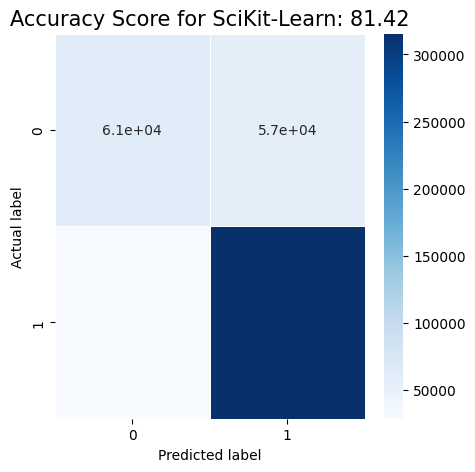

In [11]:
#Visual Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for SciKit-Learn: {0}'.format(round(accuracy_score(y_test, predictions)*100 ,2))
plt.title(all_sample_title, size = 15)

In [12]:
#Print Confusion Matrix
print("Sklearn Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Sklearn Precision: ", precision_score(y_test, predictions, average=None))
print("Sklearn Recall:    ", recall_score(y_test, predictions, average=None))
print("Sklearn F1 score:  ", f1_score(y_test, predictions, average=None))
print("------------------------------------------ ")

SKLearn_Precision = precision_score(y_test, predictions, average=None)
SKLearn_Recall = recall_score(y_test, predictions, average=None)
SKLearn_F1 = f1_score(y_test, predictions, average=None)

print("\nSklearn Classification Report:\n",classification_report(y_test, predictions))

Sklearn Confusion Matrix:
[[ 61440  57344]
 [ 28672 315392]]
Sklearn Precision:  [0.68181818 0.84615385]
Sklearn Recall:     [0.51724138 0.91666667]
Sklearn F1 score:   [0.58823529 0.88      ]
------------------------------------------ 

Sklearn Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.52      0.59    118784
           1       0.85      0.92      0.88    344064

    accuracy                           0.81    462848
   macro avg       0.76      0.72      0.73    462848
weighted avg       0.80      0.81      0.81    462848



In [13]:
#Model Comparison
model_comparison = pd.DataFrame(
    {'Accuracy ': [format(accuracy_score(y_test, predictions),'.2%'), format(accuracy_score(y_test, predictions),'.2%')],
    'F1 Score': [((SKLearn_F1[1]* 100).astype(str) + " %"), ((SKLearn_F1[1]* 100).astype(str) + " %")],
    'Train Time (s)': [SASViyaML_Train_Time, SKLearn_Train_Time]},
    ["SAS Viya ML ", "Scikit-Learn "]
)

model_comparison

,Accuracy,F1 Score,Train Time (s)
SAS Viya ML,81.42%,88.0 %,20.7 s ± 0 ns per loop (mean ± std. dev. of 1 ...
Scikit-Learn,81.42%,88.0 %,19 s ± 0 ns per loop (mean ± std. dev. of 1 ru...
